## Hierarchical clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:
def plot_dendrogram(model, X):
    linkage_matrix = linkage(X, model.linkage)

    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, color_threshold=0)

### Hierarchical clustering on example dataset

In [3]:
data = loadmat('data.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
X = data['X']
print('X:', X.shape)

X: (300, 2)


In [5]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

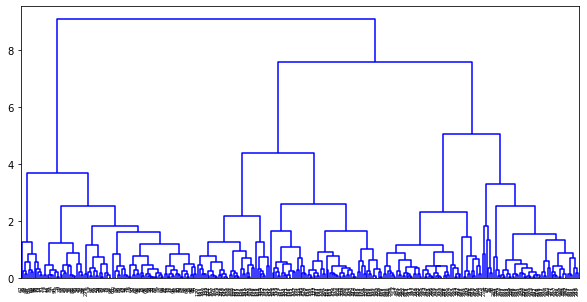

In [6]:
plot_dendrogram(model, X)

Text(0.5, 1.0, 'Hierarchical clustering results')

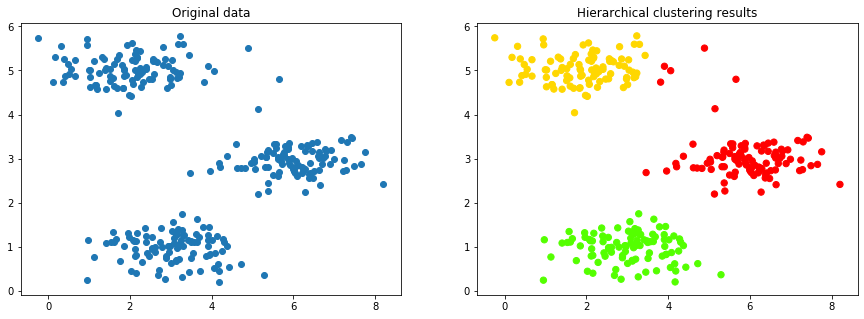

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1])
plt.title('Original data')

plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], s=40, c=model.labels_, cmap=plt.cm.prism) 
plt.title('Hierarchical clustering results')

### Image compression with hierarchical clustering

In [8]:
original_image = plt.imread('bird_small.png')
img_h = original_image.shape[0]
img_w = original_image.shape[1]
print(original_image.shape)

(128, 128, 3)


In [9]:
img = original_image/255
img = img.reshape(img_h*img_w, 3)
img.shape

(16384, 3)

In [10]:
model = AgglomerativeClustering(n_clusters=16)
model.fit(img)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=16,
                        pooling_func='deprecated')

In [11]:
centers = np.zeros((model.n_clusters, 3))
for i in range(0, model.n_clusters):
    cluster_points = img[model.labels_ == i]
    cluster_mean = np.mean(cluster_points, axis=0)
    centers[i, :] = cluster_mean

In [12]:
compressed_image = centers[model.labels_].reshape(img_h, img_w, 3)

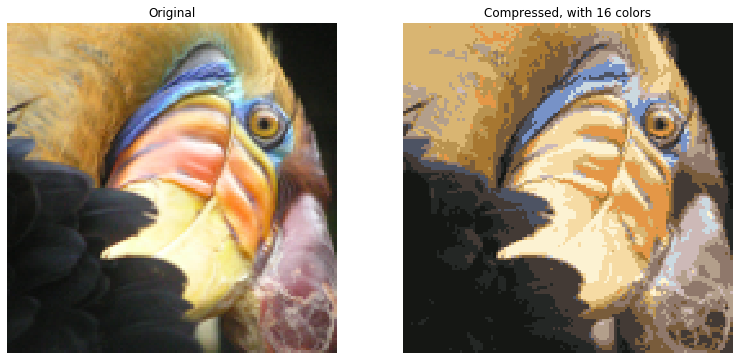

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(original_image)
ax1.set_title('Original')
ax2.imshow(compressed_image*255)
ax2.set_title(f'Compressed, with {model.n_clusters} colors')

for ax in fig.axes:
    ax.axis('off')